In [1]:
import pandas as pd 
import os
import re
from functions import read_data, read_prices, cumul_volumes, basic_charts, get_all_data, calc_performance
import matplotlib
import datetime
%matplotlib inline 
#notebook

In [ ]:
#import earthpy as et
# Change the directory to that path
#os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [2]:
#Use caase 0.2 - read & clean everything together
dt = calc_performance(get_all_data())

You have/had investments in these funds: 
 {'Emerging Markets Equity Fund', 'Growth Fund (Annuity Lifestyle)', 'North America Equity Tracker Fund', 'World (ex-UK) Equity Tracker Fund', 'Global Equity Fund', 'Sustainable Global Equity Fund', 'UK Equity Tracker Fund'}


/Users/odubyna/Github/perftrack/functions.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df['UnitsCumul'] = round(cur_df['Units'].cumsum(),2)
/Users/odubyna/Github/perftrack/functions.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df['ValueCumul'] = round(cur_df['Value'].cumsum(),2)
/Users/odubyna/Github/perftrack/functions.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [14]:
dt.reset_index(inplace = True)

In [16]:
dt.head()

,Unit Price Date,Invested,InvCumul,CurVal,Profit,Performance
0,2018-02-28,779.51,779.51,779.50,-0.01,-0.00
1,2018-03-28,599.40,1378.91,1357.30,-21.61,-0.02
2,2018-04-30,599.40,1978.31,1995.46,17.15,0.01
3,2018-05-31,599.40,2577.71,2630.50,52.79,0.02
4,2018-06-28,599.40,3177.11,3227.58,50.47,0.02


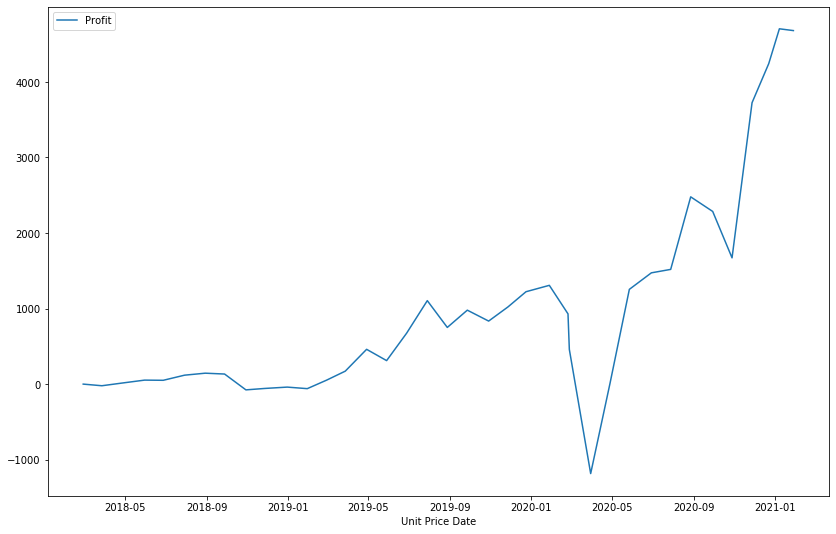

In [17]:
line_c = dt.plot(x = 'Unit Price Date', y = 'Profit', kind= 'line', figsize=(14,9))

In [ ]:
os.getcwd()

In [ ]:
#Use case 0.1 - read prices and data separately
data, prices = cumul_volumes(read_data()), read_prices()

In [ ]:
prices[prices[]].head()

In [ ]:
prices.Fund.unique()

In [ ]:
data.Fund.unique()

In [ ]:
data[data['Fund'] == 'UK Equity Tracker Fund']

In [ ]:
#data[data['Unit Price Date'] == '2019-12-24']

In [ ]:
#data.groupby('Unit Price Date')['Unit Price Date','Fund','UnitsCumul'].tail()

In [ ]:
data.tail(10)

In [ ]:
line_c = data[data['Fund'] == 'North America Equity Tracker Fund'] \
    .plot(x = 'Unit Price Date' , y = 'UnitsCumul', kind= 'line', figsize=(14,9))

In [ ]:
prices.head()

In [ ]:
prices['Fund Name'].unique()

In [ ]:
line_chart = prices[prices['Fund Name'] == 'UK Equity Tracker Fund'] \
    .plot(x = 'Unit Price Date' , y = 'Unit Price', kind= 'line', figsize=(14,9))

In [ ]:
for fnd in prices['Fund Name'].unique():
    line_chart = prices[prices['Fund Name'] == fnd] \
    .plot(x = 'Unit Price Date' , y = 'Unit Price', kind= 'line', figsize=(14,9), title = fnd)
    

In [ ]:
#line_chart = prices[(prices['Unit Price Date'] > datetime.date(2020,1,1)) & \
#       (prices['Unit Price Date'] < datetime.date(2021,1,1)) & \
#        (prices['Fund Name'] == 'UK Equity Tracker Fund')] \
#    .plot.line(x = 'Unit Price Date' , y = 'Unit Price')

In [ ]:
#mtr = prices[(prices['Unit Price Date'] > datetime.date(2020,12,1)) & \
#       (prices['Unit Price Date'] < datetime.date(2021,1,1)) & \
#        (prices['Fund Name'] == 'UK Equity Tracker Fund')]

In [ ]:
#
#mtr = prices[(prices['Unit Price Date'] > datetime.date(2020,1,1)) & \
#       (prices['Unit Price Date'] < datetime.date(2021,1,1)) & \
#        (prices['Fund Name'] == 'UK Equity Tracker Fund') & \
#            (prices['Unit Price'] > 2.0) & \
#       (prices['Unit Price'] < 3.0) ]

In [ ]:
data.Fund.unique()

In [ ]:
for i in data.Fund.unique():
    print (i)

In [ ]:
alldata = pd.merge(data, prices, how='left', left_on = ('Unit Price Date','Fund'),
                   right_on = ('Unit Price Date','Fund'), copy=True)

In [ ]:
alldata.info()

In [ ]:
alldata[alldata['Unit Price'].isnull()]

In [ ]:
alldata.info()

In [ ]:
alldata[alldata['Unit Price Date'] == datetime.date(2018,12,31)]

In [ ]:
alldata[alldata['Unit Price Date'] == datetime.date(2018,12,31)]

In [ ]:
alldata.groupby('Fund')['Fund','Unit Price Date','Unit Price'].head()

In [ ]:
alldata['Unit Price'] = alldata.groupby('Fund')['Unit Price'].fillna(method = 'ffill')

In [ ]:
alldata[alldata['Unit Price Date'] == datetime.date(2018,12,31)]

In [ ]:
dt[(dt['Unit Price'].isnull()) & (dt['ValueCumul'].notnull())]

In [ ]:
dt.info()

In [ ]:
dt[dt['Unit Price Date'] == datetime.date(2018,12,31)]

In [ ]:
dt[dt['Unit Price Date'] == datetime.date(2018,11,27)]

In [ ]:
dt.tail(20)

In [ ]:
dt.groupby('Unit Price Date')['Unit Price Date','Value','Invested','InvCumul','CurVal'].sum()

In [ ]:
data.tail(20)

In [ ]:
testframe = pd.read_csv(os.path.join('data', 'transaction-details (34).csv'), sep=',',
                                                  header='infer', dayfirst=True, cache_dates=False)

In [ ]:
testframe.loc[0][0]

In [ ]:
 n = float(re.findall(r"[-+]?\d*\.\d+|\d+", testframe.loc[0][0])[0])

In [ ]:
n